# Practicing Webscraping

Last week we got a basic taste of webscraping. This week we will be applying that knowledge to a few more websites.  
The data we will collect will be put into a pandas dataframe  

Helpful link:  
https://medium.com/geekculture/web-scraping-tables-in-python-using-beautiful-soup-8bbc31c5803e

## Website 1: Olympic Medal Statistics   

Imports and getSoup function:

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

def getSoup(url: str) -> BeautifulSoup:
    page = requests.get(url)
    bs = BeautifulSoup(page.content, "html.parser")
    page.close()
    return bs

/Users/advaysingh/Documents/env/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Website URL:
(hint: you need to create a soup object)

In [2]:

url = "https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table"
# get soup object
soup = getSoup(url)
print(soup.prettify())


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   All-time Olympic Games medal table - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-fea

#### Exercise 1.1: Getting the data
 Scrape the first table and put it into a pandas df with columns 'Country', 'Gold', 'Silver', 'Bronze', and 'Total'

In [3]:
    #print(td.text.strip())

In [4]:
# Scrape and put into df here
from bs4 import Tag
def scrape_table(table: Tag): #-> tuple[str]:
    countries = table.find('a')
    if (countries):
        country_name = (countries.text.strip())
        print(country_name)


for td in soup.find_all('td'):
    scrape_table(td)
    


Bids
Summer
v
Afghanistan
Algeria
Argentina
Armenia
Australasia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Barbados
Belarus
Belgium
Bermuda
Bohemia
Botswana
Brazil
British West Indies
Bulgaria
Burkina Faso
Burundi
Cameroon
Canada
Chile
China
Colombia
Costa Rica
Ivory Coast
Croatia
Cuba
Cyprus
Czech Republic
Czechoslovakia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
Eritrea
Estonia
Ethiopia
Fiji
Finland
France
Gabon
Georgia
Germany
United Team of Germany
East Germany
West Germany
Ghana
Great Britain
Greece
Grenada
Guatemala
Guyana
Haiti
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
North Korea
South Korea
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liechtenstein
Lithuania
Luxembourg
Malaysia
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Mozambique
Namibia
Netherlands
Netherlands Antilles
New Zealand
Niger
Nigeria

Norway
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Puerto Rico
Qatar
Romania
Russia


In [5]:
tables = soup.find_all('tables')
table = soup.find('table', class_='wikitable sortable' )
df = pd.DataFrame(columns=['Country', 'Gold', 'Sliver', 'Bronze', 'Total'])
list1 = []
for row in table.tbody.find_all('tr'):
    columns = row.find_all('td')

    if(columns != []):
        country = columns[0].text.strip()
        gold = columns[12].text
        silver = columns[13].text
        bronze = columns[14].text
        total = int(columns[15].text.strip().replace(',', ''))
        list1.append([country, gold, silver, bronze, total])

dnf = pd.DataFrame(list1, columns=['Country', 'Gold', 'Silver', 'Bronze', 'Total'])
dnf.head()

,Country,Gold,Silver,Bronze,Total
0,Afghanistan (AFG),0,0,2,2
1,Algeria (ALG),5,4,8,17
2,Argentina (ARG),21,26,30,77
3,Armenia (ARM),2,8,8,18
4,Australasia (ANZ) [ANZ],3,4,5,12


#### Exercise 1.2: Visualization
Create a visualization of the number of Gold, Silver, and Bronze medals for the top 5 countries with the most total medals using pandas

In [6]:
# Visualization here
dnf2 = dnf.sort_values('Total', ascending = False)
dnf2.head()

,Country,Gold,Silver,Bronze,Total
144,United States (USA) [P] [Q] [R] [Z] [F],"1,174",952,833,2959
110,Soviet Union (URS) [URS],473,376,355,1204
51,Great Britain (GBR) [GBR] [Z],296,323,331,950
46,Germany (GER) [GER] [Z],305,305,312,922
43,France (FRA) [O] [P] [Z],264,293,332,889


## Website 2: Top 100 ATP Tour tennis rankings

Website URL:

In [7]:
url = "https://www.atptour.com/en/rankings/singles"
# get soup object
soup2 = getSoup(url)
print(soup2.prettify())

<!DOCTYPE html>
<!-- START : /modules/global/head -->
<!--[if lt IE 7]>
    <html class="no-js lt-ie10 lt-ie9 lt-ie8 lt-ie7 " data-lang="en">
<![endif]-->
<!--[if IE 7]>
    <html class="no-js lt-ie10 lt-ie9 lt-ie8 " data-lang="en">
<![endif]-->
<!--[if IE 8]>
    <html class="no-js lt-ie10 lt-ie9 " data-lang="en">
<![endif]-->
<!--[if IE 9]>
    <html class="no-js lt-ie10 " data-lang="en">
<![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js" data-lang="en" translate="no">
 <!--<![endif]-->
 <head>
  <!-- disable auto format for telephone numbers -->
  <meta content="telephone=no" name="format-detection"/>
  <title>
   ATP Rankings | Pepperstone ATP Rankings (Singles) | ATP Tour | Tennis | ATP Tour | Tennis
  </title>
  <meta content="initial-scale=1.0, width=768, user-scalable=yes, minimum-scale=1.0, maximum-scale=1.25" name="viewport"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="Tennis, Men, Rankings, ATP" name="key

#### Exercise 2.1: Getting the data
Scrape the table of top 100 tennis rankings put into df with columns of your choice

In [8]:
table = soup2.find('table', class_='mega-table')
list2 = []
for row in table.tbody.find_all('tr'):
    col = row.find_all('td')
    if(col != []):
        rank = col[0].text.strip()
        player = col[3].text.strip()
        age = int(col[4].text.strip())
        points = int(col[5].text.strip().replace(',', ''))
        tournaments = int(col[7].text.strip())
        list2.append([rank, player, age, points, tournaments])

df_tennis = pd.DataFrame(list2, columns = ['Rank', 'Player', 'Age', 'Points', 'Tournaments Played'])
df_tennis.head()

,Rank,Player,Age,Points,Tournaments Played
0,1,Novak Djokovic,36,11795,19
1,2,Carlos Alcaraz,20,8535,17
2,3,Daniil Medvedev,27,7280,22
3,4,Holger Rune,20,4710,22
4,5,Stefanos Tsitsipas,25,4615,23


#### Exercise 2.2: Visualization
Create any interesting visualization using the df you made

In [9]:
df_tennis.sort_values('Age', ascending = False).head()

,Rank,Player,Age,Points,Tournaments Played
39,40,Stan Wawrinka,38,1084,21
64,65,Richard Gasquet,37,840,33
0,1,Novak Djokovic,36,11795,19
40,41,Andy Murray,36,1075,22
96,97,Albert Ramos-Vinolas,35,628,34


In [10]:
df_tennis.sort_values('Points', ascending = False).head()

,Rank,Player,Age,Points,Tournaments Played
0,1,Novak Djokovic,36,11795,19
1,2,Carlos Alcaraz,20,8535,17
2,3,Daniil Medvedev,27,7280,22
3,4,Holger Rune,20,4710,22
4,5,Stefanos Tsitsipas,25,4615,23


In [11]:
df_tennis.sort_values('Tournaments Played', ascending = False).head()

,Rank,Player,Age,Points,Tournaments Played
49,50,Aleksandar Vukic,27,947,35
96,97,Albert Ramos-Vinolas,35,628,34
85,86,Alexander Shevchenko,22,705,34
64,65,Richard Gasquet,37,840,33
52,53,Christopher O'Connell,29,930,32


In [12]:
df_tennis.shape

(100, 5)

Text(0, 0.5, 'Rank')

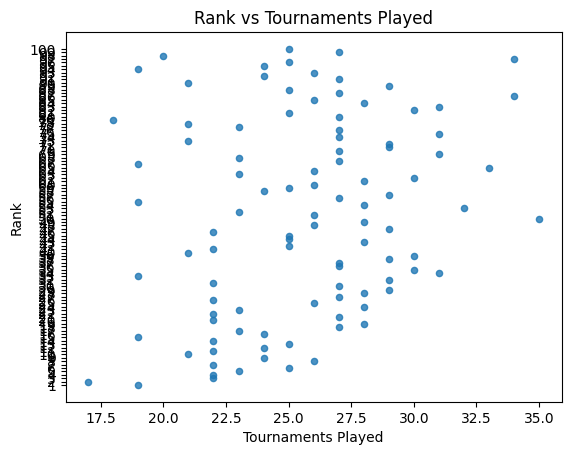

In [17]:
df_tennis.plot.scatter(x='Tournaments Played', y='Rank', alpha = 0.8)
plt.title('Rank vs Tournaments Played')
plt.xlabel('Tournaments Played')
plt.ylabel('Rank')

Text(0, 0.5, 'Rank')

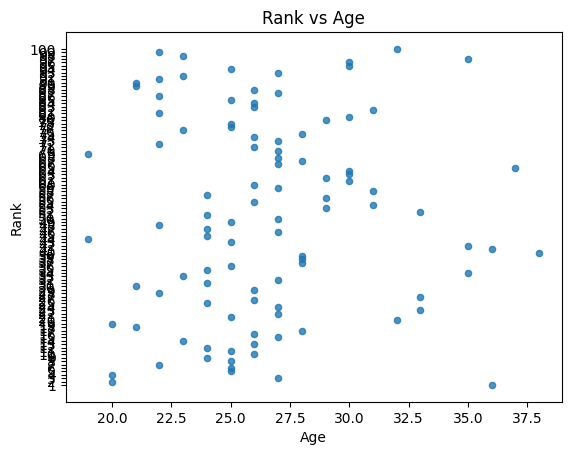

In [19]:
df_tennis.plot.scatter(x='Age', y='Rank', alpha = 0.8)
plt.title('Rank vs Age')
plt.xlabel('Age')
plt.ylabel('Rank')

Text(0, 0.5, 'Tournaments Played')

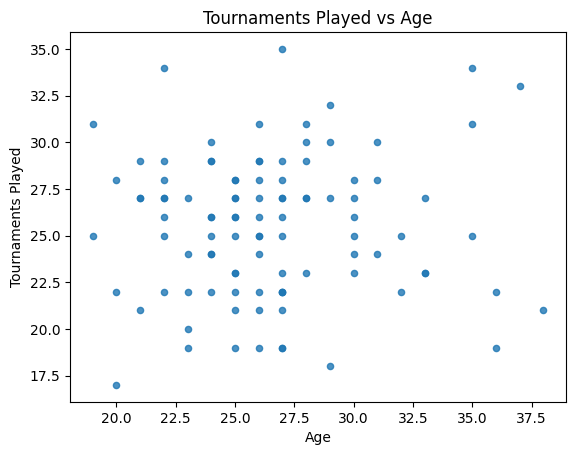

In [20]:
df_tennis.plot.scatter(x='Age', y='Tournaments Played', alpha = 0.8)
plt.title('Tournaments Played vs Age')
plt.xlabel('Age')
plt.ylabel('Tournaments Played')